# Exploratory Data Analysis

### Importing Some useful libraries

In [ ]:
## GIT Practice data 11 05 2024


In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [90]:
df = pd.read_csv("7. Udemy Courses.csv")

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3682 entries, 0 to 3681
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   course_id            3682 non-null   int64 
 1   course_title         3682 non-null   object
 2   is_paid              3682 non-null   bool  
 3   price                3682 non-null   object
 4   num_subscribers      3682 non-null   int64 
 5   num_reviews          3682 non-null   int64 
 6   num_lectures         3682 non-null   int64 
 7   level                3682 non-null   object
 8   content_duration     3682 non-null   object
 9   published_timestamp  3682 non-null   object
 10  subject              3682 non-null   object
dtypes: bool(1), int64(4), object(6)
memory usage: 291.4+ KB


### Feature Engineering

In [147]:
# Converting price column type from object to int  
df["price"].unique()
df["price"] = ["0" if i == "Free" else i for i in df["price"]]
df["price"] = df["price"].apply(int)


# Converting Published_Timestamp datetype from object to datetime 
df["published_timestamp"] = pd.to_datetime(df["published_timestamp"])

### Check for converted data types 

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3682 entries, 0 to 3681
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3682 non-null   int64              
 1   course_title         3682 non-null   object             
 2   is_paid              3682 non-null   bool               
 3   price                3682 non-null   int64              
 4   num_subscribers      3682 non-null   int64              
 5   num_reviews          3682 non-null   int64              
 6   num_lectures         3682 non-null   int64              
 7   level                3682 non-null   object             
 8   content_duration     3682 non-null   object             
 9   published_timestamp  3682 non-null   datetime64[ns, UTC]
 10  subject              3682 non-null   object             
dtypes: bool(1), datetime64[ns, UTC](1), int64(5), object(4)
memory usage: 291.4+ KB


In [39]:
# round(df["content_duration"].value_counts().nlargest(10)*100/len(df),2)

### Stats to Check Outliers, values distribution

In [167]:
# Summary Statistics
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures
count,3.682000e+03,3682.000000,3682.000000,3682.000000,3682.000000
mean,6.766121e+05,66.010320,3194.230310,156.093156,40.065182
std,3.436355e+05,60.984167,9499.378361,934.957204,50.373299
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000
25%,4.078430e+05,20.000000,110.250000,4.000000,15.000000
50%,6.885580e+05,45.000000,911.500000,18.000000,25.000000
75%,9.617515e+05,95.000000,2540.250000,67.000000,45.000000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000


### Duplicate Values

In [65]:
# Finding duplicate values 
df[df.duplicated()]
# However Few columns are common, but these  are not totally a duplicate rows. 

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
726,1084454,CFA Level 2- Quantitative Methods,True,40,0,0,35,All Levels,5.5 hours,2017-07-02 14:29:35+00:00,Business Finance
1186,837322,Essentials of money value: Get a financial Life !,True,20,0,0,20,All Levels,37 mins,2016-05-16 18:28:30+00:00,Business Finance
1910,1157298,Introduction to Forex Trading Business For Beg...,True,20,0,0,27,Beginner Level,1.5 hours,2017-04-23 16:19:01+00:00,Business Finance
2431,28295,Learn Web Designing & HTML5/CSS3 Essentials in...,True,75,43285,525,24,All Levels,4 hours,2013-01-03 00:55:31+00:00,Web Development
2597,185526,MicroStation - Células,True,20,0,0,9,Beginner Level,37 mins,2014-04-15 21:48:55+00:00,Graphic Design
3516,1035638,Understanding Financial Statements,True,25,0,0,10,All Levels,1 hour,2016-12-15 14:56:17+00:00,Business Finance


### Category Distribution

In [170]:
df.describe(exclude = "number")

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,course_title,is_paid,level,content_duration,published_timestamp,subject
count,3682,3682,3682,3682,3682,3682
unique,3667,2,4,109,3676,4
top,Acoustic Blues Guitar Lessons,True,All Levels,1 hour,2016-05-16 18:28:30+00:00,Web Development
freq,3,3372,1932,607,2,1200
first,NaN,NaN,NaN,NaN,2011-07-09 05:43:31+00:00,NaN
last,NaN,NaN,NaN,NaN,2017-07-06 21:46:30+00:00,NaN


### Category Count in Object type columns 


In [175]:
# Unique Value Filter below 25
df.describe(exclude = "number").iloc[1].sort_values(ascending = False)[df.describe(exclude = "number").iloc[1].sort_values(ascending = False).values <25 ]

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


subject    4
level      4
is_paid    2
Name: unique, dtype: object

### Missing Values 

In [64]:
# Missing Values Count
df.isnull().sum()

course_id              0
course_title           0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

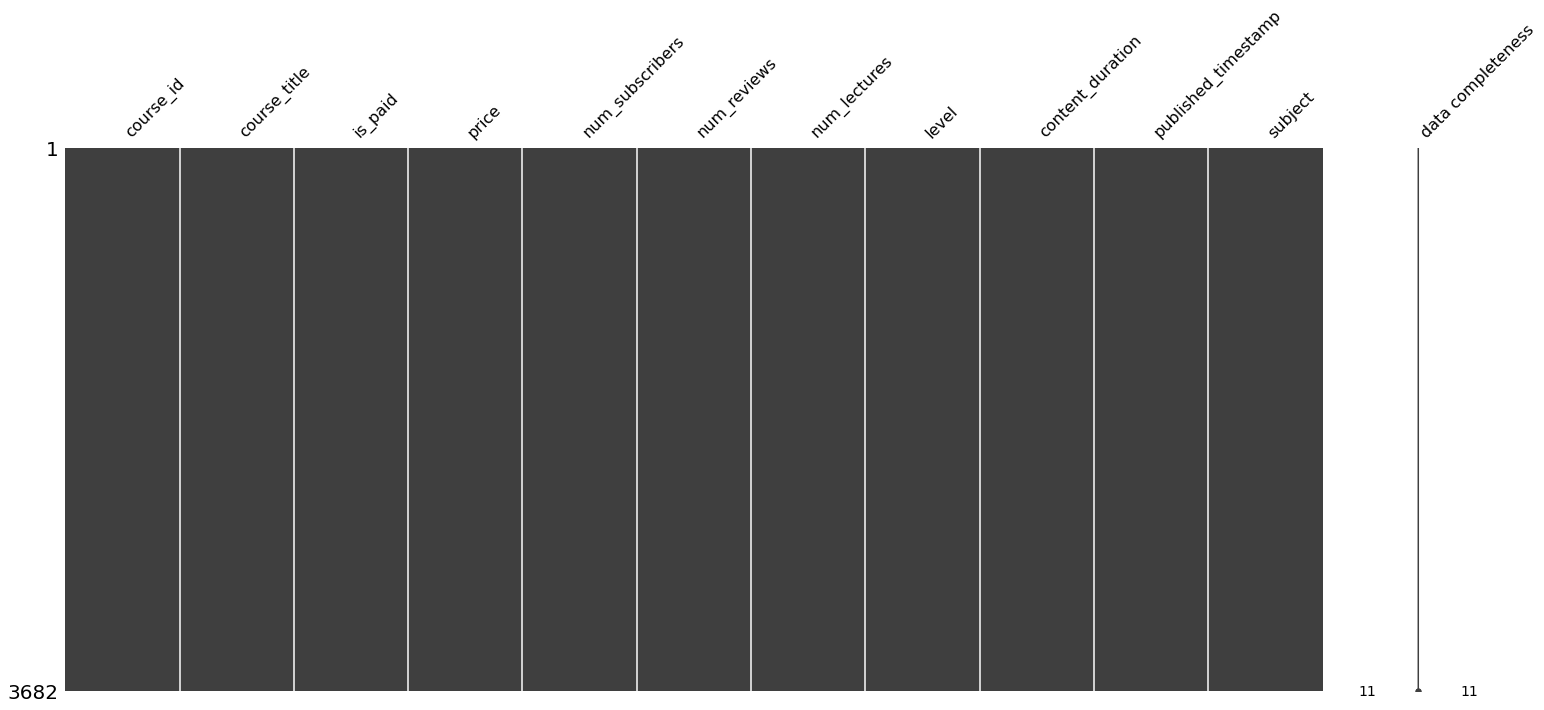

In [41]:
# Visualising Missing data (Missing values if any will be represented in horizontal line)
pip install missingno
import missingno as msno
msno.matrix(df,labels = True, sort = 'descending');

### Outliers

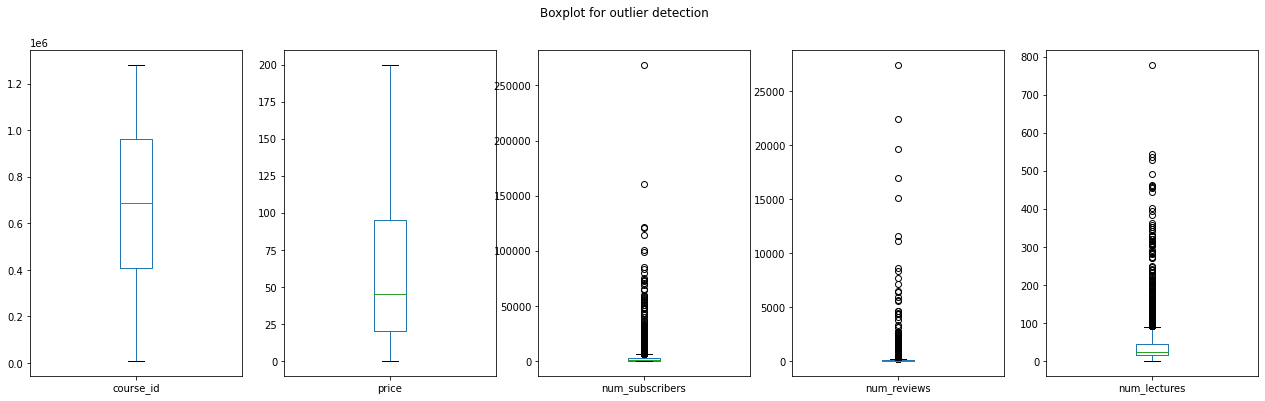

In [97]:
df.plot(kind = "box", subplots = True, figsize = (22, 6), title = "Boxplot for outlier detection", );
plt.tight_layout;
# As Min, Max values from Statistics summmary shows that no values are outliers.
# df[columns[1:]].hist(bins = 8, figsize = (20,5), layout = (-1,5), edgecolor = "black")
# plt.tight_layout();

### Variable Analysis

#### Univariate Analysis

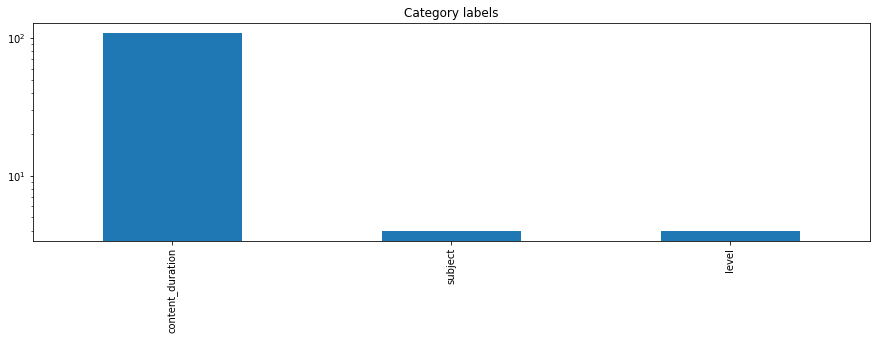

In [173]:
Unique_values.plot.bar( figsize = (15,4), logy= True)
plt.title("Category labels");

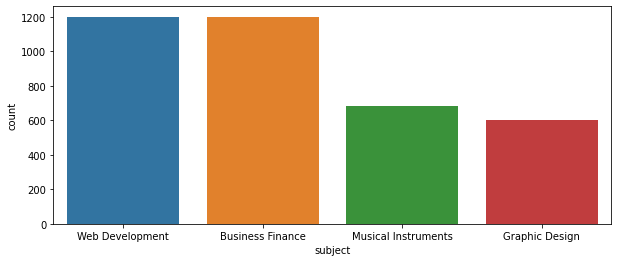

In [178]:
df.groupby("subject").subject.count().sort_values(ascending = False)
order = df.groupby("subject").subject.count().sort_values(ascending = False).index
plt.figure(figsize=(10,4))
sns.countplot(x = "subject", data = df, order = order );


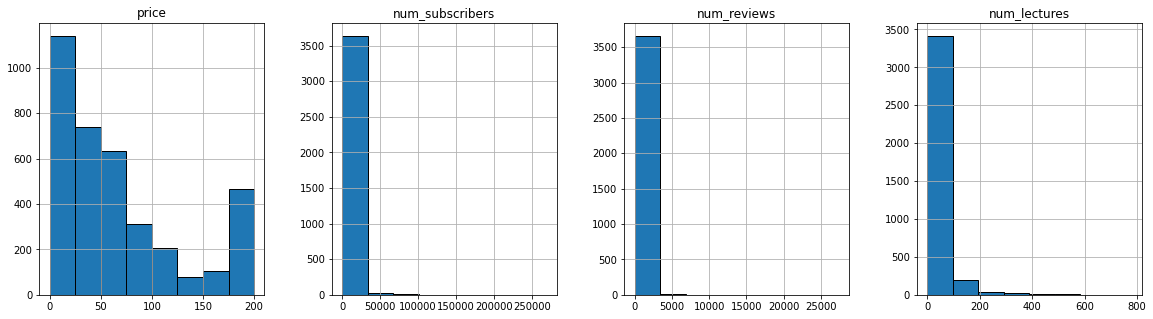

In [151]:
# Histogram chart for continuos variable
df.select_dtypes( "int64" ).iloc[ :, 1:].hist(bins = 8, figsize = (25,5), layout = (-1,5), edgecolor = "black")
plt.title("Histogram Chart For Conitnuos Variable");

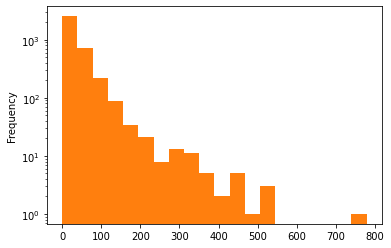

In [151]:
# df["price"].plot(kind = "hist", bins = 10);
df["num_lectures"].plot(kind = "hist", bins = 20, logy = True);
# df["price"].plot(kind = "hist", bins = 10);
df["num_lectures"].plot(kind = "hist", bins = 20);

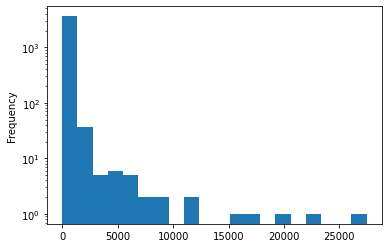

In [155]:

df["num_reviews"].plot(kind = "hist", bins = 20, logy = True);

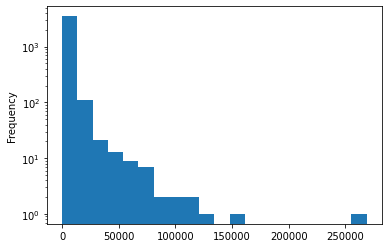

In [157]:

df["num_subscribers"].plot(kind = "hist", bins = 20, logy = True);

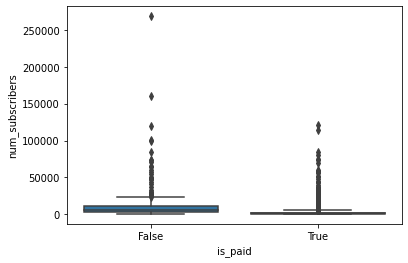

In [121]:
sns.boxplot("is_paid", "num_subscribers",data = df)
plt.show()

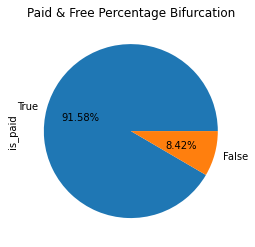

In [125]:
df["is_paid"].value_counts().plot(kind = "pie",  autopct = "%.2f%%", title = "Paid & Free Percentage Bifurcation")
plt.show();

<AxesSubplot:title={'center':'Level Category Bifurcation'}, ylabel='level'>

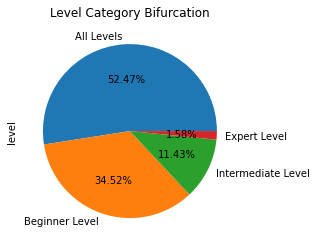

In [126]:
df["level"].value_counts().plot(kind = "pie",  autopct = "%.2f%%", title = "Level Category Bifurcation")

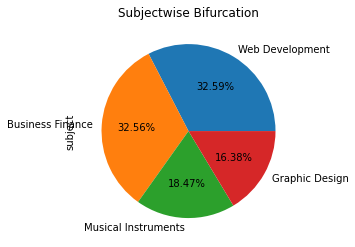

In [152]:
df["subject"].value_counts().plot(kind = "pie",  autopct = "%.2f%%", title = "Subjectwise Bifurcation");

#### Bi-vairiate Analysis

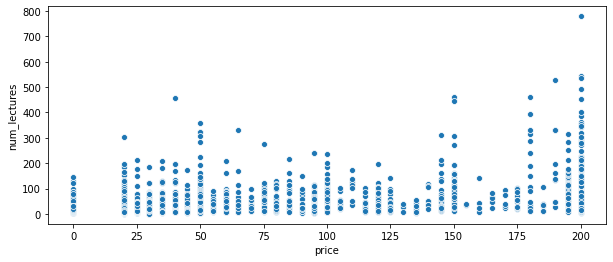

In [153]:
# Scatterplot
plt.figure(figsize=(10,4))
sns.scatterplot(x= "price", y = "num_lectures", data = df);

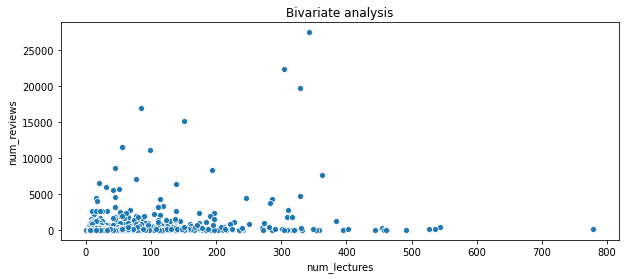

In [154]:
plt.figure(figsize=(10,4))
sns.scatterplot(x= "num_lectures", y = "num_reviews", data = df)
plt.title("Bivariate analysis");


### Mutivariate analysis

In [161]:
columns = df.describe(include = "number").columns

In [163]:
column =['course_title',  'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'content_duration',
       'published_timestamp', 'subject']

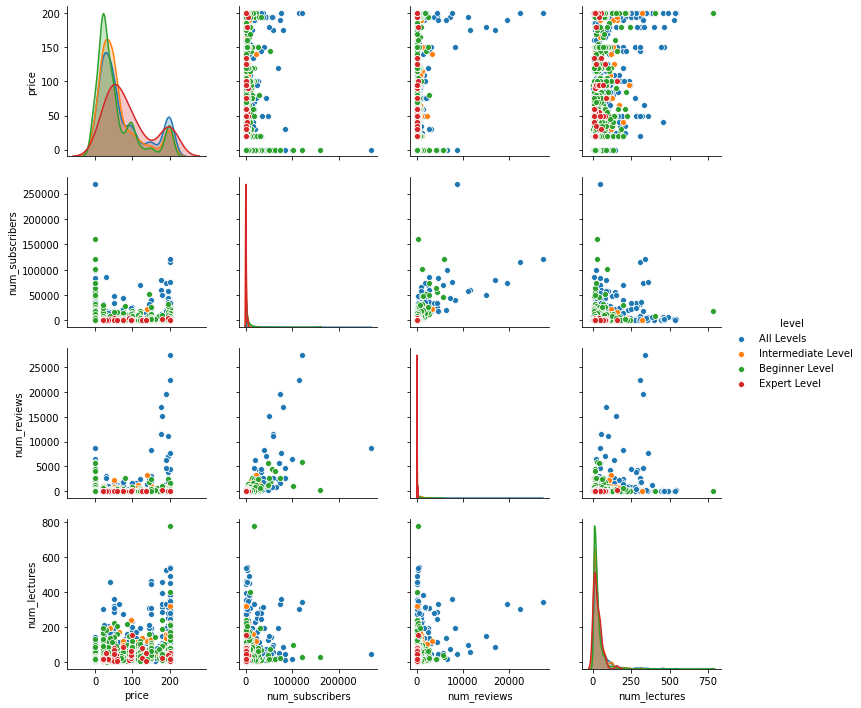

In [164]:
 
sns.pairplot(df[column], hue = "level");

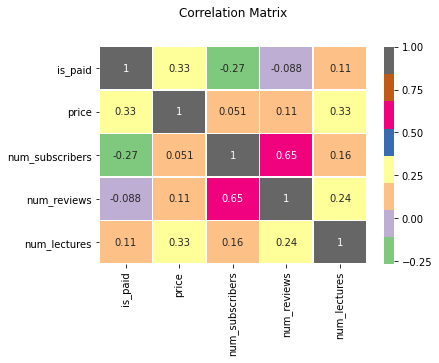

In [159]:
# Mutivariate analysis 

sns.heatmap(df.iloc[:, 1:].corr(), annot = True, linewidths=.5, cmap="Accent")
plt.title("Correlation Matrix", pad = 30)
plt.show()

# num_subcribers and num_views have strong correlation